## Import Libraries and Data

In [265]:
pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   ------------------------------------ --- 256.0/282.6 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [282]:
import pandas as pd
import numpy as np
import missingno as msno  #to visualize the distribution of Nan values
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering

In [23]:
df = pd.read_csv('marketing_campaign.csv', delimiter='\t')

In [24]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dataset Features

#### People:
**ID:** *Customer's unique identifier*  
**Year_Birth:** *Customer's birth year*  
**Education:** *Customer's education level*  
**Marital_Status:** *Customer's marital status*  
**Income:** *Customer's yearly household income*  
**Kidhome:** *Number of children in customer's household*  
**Teenhome:** *Number of teenagers in customer's household*  
**Dt_Customer:** *Date of customer's enrollment with the company*  
**Recency:** *Number of days since customer's last purchase*  
**Complain:** *1 if the customer complained in the last 2 years, 0 otherwise*

#### Products:
**MntWines:** *Amount spent on wine in last 2 years*  
**MntFruits:** *Amount spent on fruits in last 2 years*  
**MntMeatProducts:** *Amount spent on meat in last 2 years*  
**MntFishProducts:** *Amount spent on fish in last 2 years*  
**MntSweetProducts:** *Amount spent on sweets in last 2 years*  
**MntGoldProds:** *Amount spent on gold in last 2 years*

#### Promotion:
**NumDealsPurchases:** *Number of purchases made with a discount*  
**AcceptedCmp1:** *1 if customer accepted the offer in the 1st campaign, 0 otherwise*  
**AcceptedCmp2:** *1 if customer accepted the offer in the 2nd campaign, 0 otherwise*  
**AcceptedCmp3:** *1 if customer accepted the offer in the 3rd campaign, 0 otherwise*  
**AcceptedCmp4:** *1 if customer accepted the offer in the 4th campaign, 0 otherwise*  
**AcceptedCmp5:** *1 if customer accepted the offer in the 5th campaign, 0 otherwise*  
**Response:** *1 if customer accepted the offer in the last campaign, 0 otherwise*

#### Place:
**NumWebPurchases:** *Number of purchases made through the company’s website*  
**NumCatalogPurchases:** *Number of purchases made using a catalogue*  
**NumStorePurchases:** *Number of purchases made directly in stores*  
**NumWebVisitsMonth:** *Number of visits to company’s website in the last month*

In [25]:
df.shape

(2240, 29)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Handling Missing Values 

In [28]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [29]:
df[df.Income.isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


<Axes: >

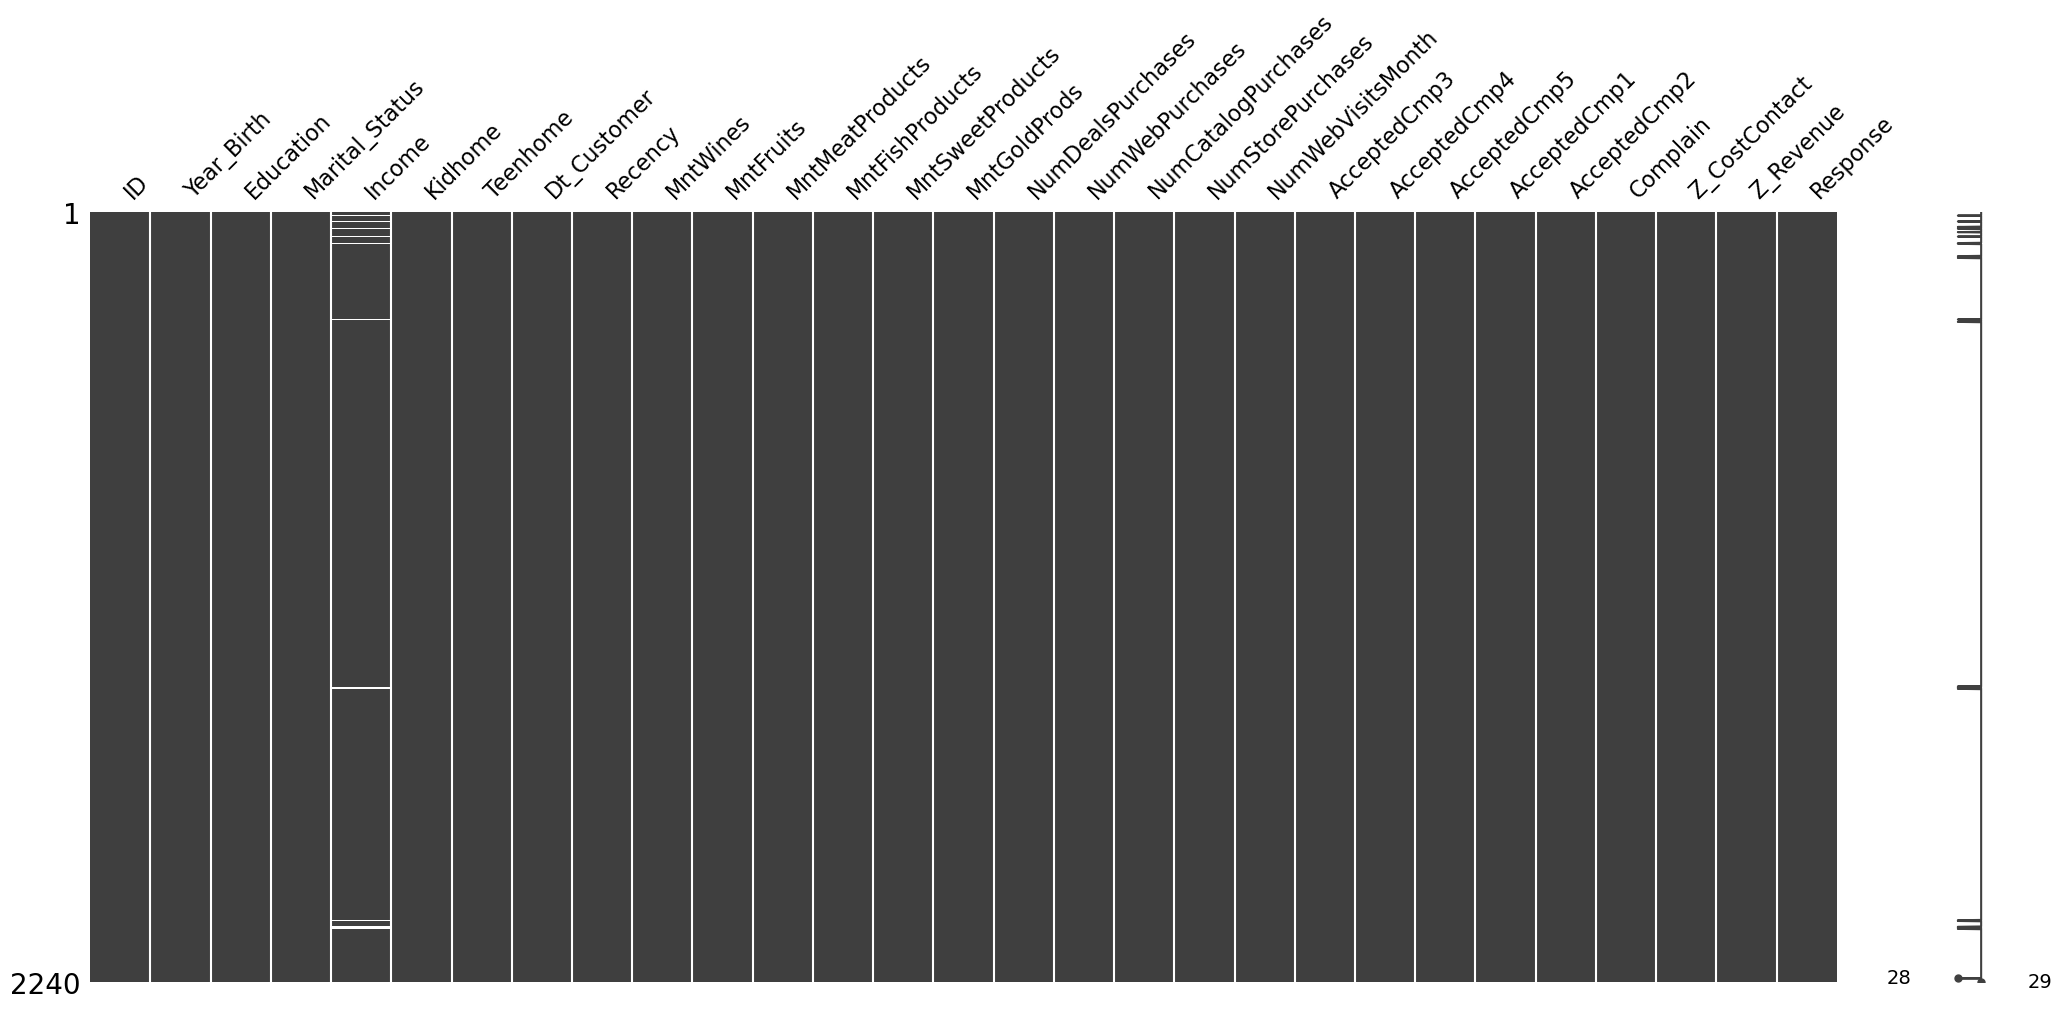

In [30]:
msno.matrix(df)

Only 24 Nan values so we can just remove it 

In [31]:
df.dropna(inplace=True)

In [32]:
df.shape

(2216, 29)

In [33]:
df.duplicated().sum()

0

No Duplicated Found

In [57]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

Converted Dt_Customer column to datetime 

In [63]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],dayfirst=True)
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in the records: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [65]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [66]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57283200000000000
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,9763200000000000
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,26956800000000000
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,12009600000000000
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,13910400000000000


## Feature Engineering

In [159]:
df['Age'] = 2024 - df['Year_Birth']

In [160]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [162]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner",
                                                    "Together":"Partner",
                                                    "Absurd":"Alone",
                                                    "Widow":"Alone",
                                                    "YOLO":"Alone",
                                                    "Divorced":"Alone",
                                                    "Single":"Alone",})

In [165]:
df['Living_With'].value_counts()

Living_With
Partner    1430
Alone       786
Name: count, dtype: int64

In [166]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

In [167]:
#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

C:\Users\DELL\AppData\Local\Temp\ipykernel_16136\2428204397.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]


In [168]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [169]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate",
                                             "2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate",
                                             "Master":"Postgraduate",
                                             "PhD":"Postgraduate"})

In [170]:
#For clarity
df=df.rename(columns={"MntWines": "Wines",
                          "MntFruits":"Fruits",
                          "MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish",
                          "MntSweetProducts":"Sweets",
                          "MntGoldProds":"Gold"})

In [171]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [172]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,43,422,Partner,1,3,1


## Data Analysis and Visualizations

In [177]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,55.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,47.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2216 non-null   object 
 1   Income               2216 non-null   float64
 2   Kidhome              2216 non-null   int64  
 3   Teenhome             2216 non-null   int64  
 4   Recency              2216 non-null   int64  
 5   Wines                2216 non-null   int64  
 6   Fruits               2216 non-null   int64  
 7   Meat                 2216 non-null   int64  
 8   Fish                 2216 non-null   int64  
 9   Sweets               2216 non-null   int64  
 10  Gold                 2216 non-null   int64  
 11  NumDealsPurchases    2216 non-null   int64  
 12  NumWebPurchases      2216 non-null   int64  
 13  NumCatalogPurchases  2216 non-null   int64  
 14  NumStorePurchases    2216 non-null   int64  
 15  NumWebVisitsMonth    2216 non-null   int64 

In [185]:
df.describe(include=object).T  #.T is for transpose

,count,unique,top,freq
Education,2216,3,Graduate,1116
Living_With,2216,2,Partner,1430


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future versi

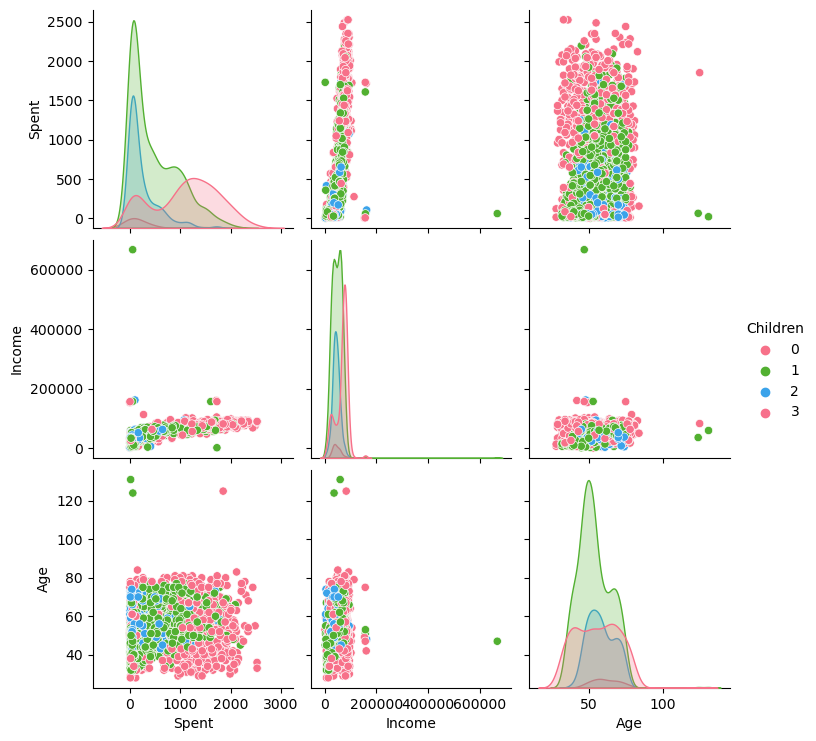

In [188]:
sns.pairplot(df , vars=['Spent','Income','Age'] , hue='Children', palette='husl');

Reletive Plot Of Some Selected Features: A Data Subset


D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pan

<Figure size 640x480 with 0 Axes>

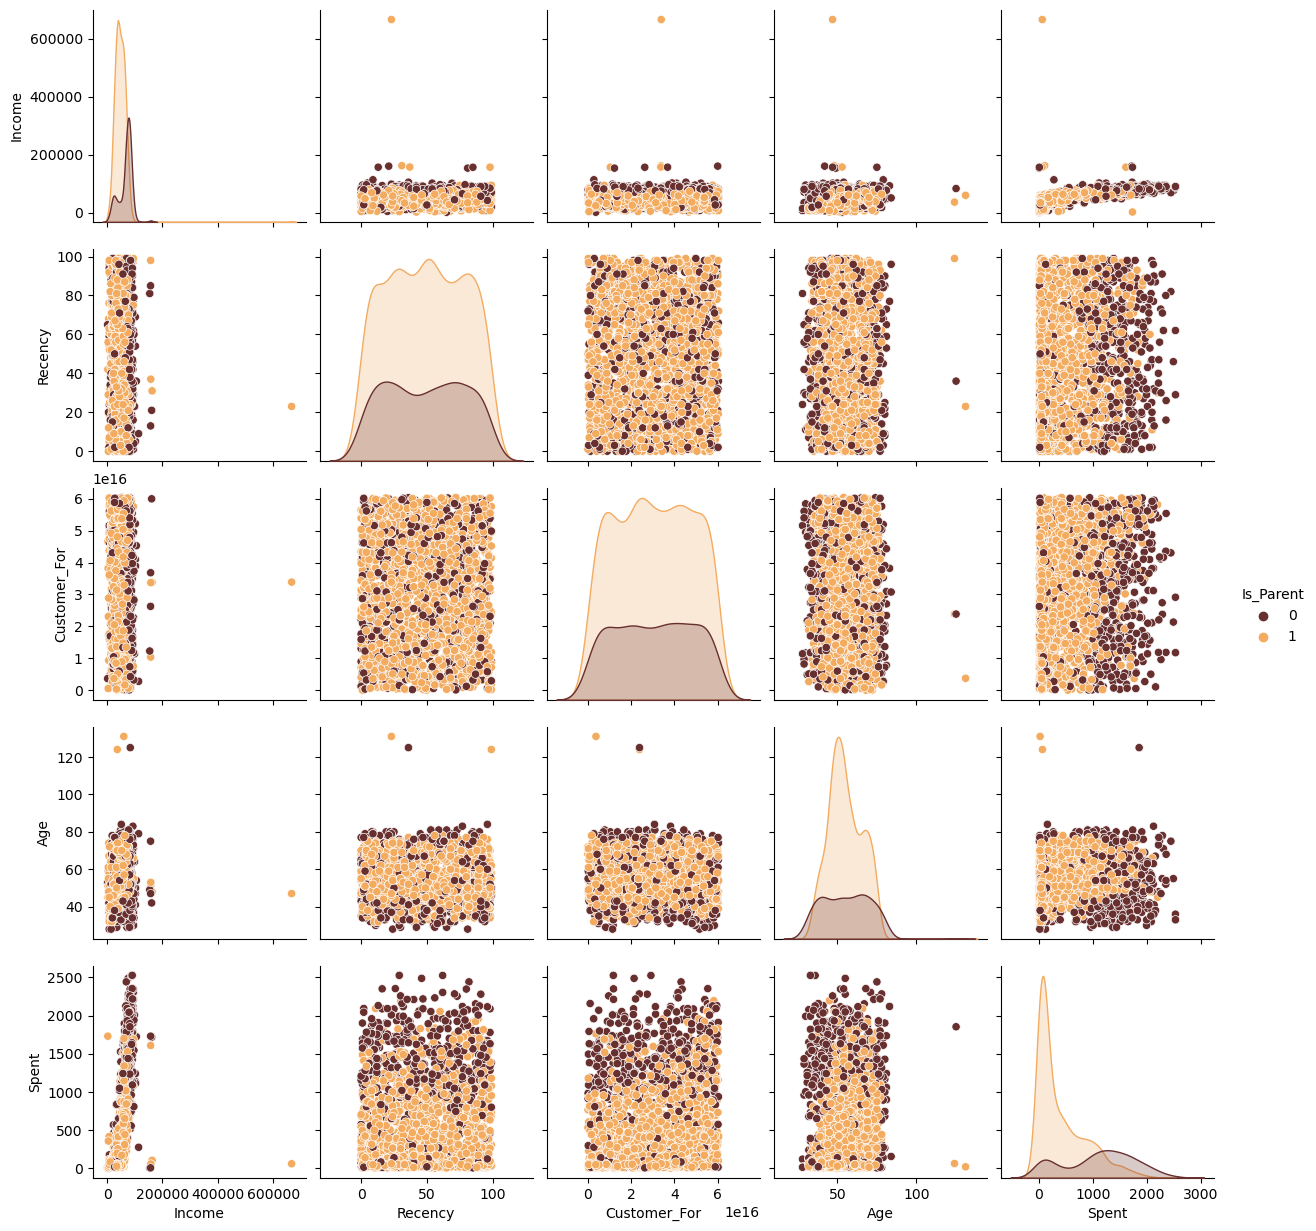

In [192]:
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

#### Handling Outliers

In [205]:
df[['Income','Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2216.0,52247.251354,25173.076661,1730.0,35303.0,51381.5,68522.0,666666.0
Age,2216.0,55.179603,11.985554,28.0,47.0,54.0,65.0,131.0


<Axes: >

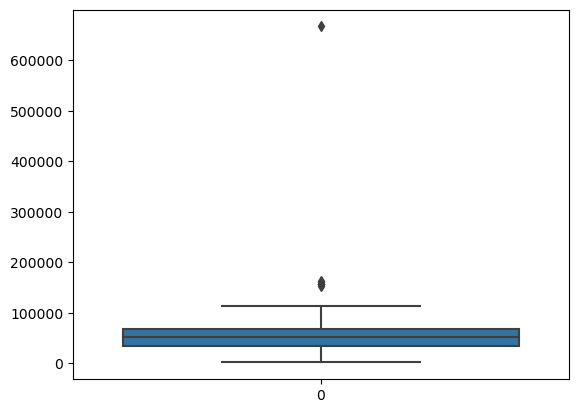

In [199]:
sns.boxplot(df['Income'])

In [217]:
# Calculate quartiles and IQR
def calculate_upper_bound(column):
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

In [218]:
calculate_upper_bound('Income')

118350.5

<Axes: >

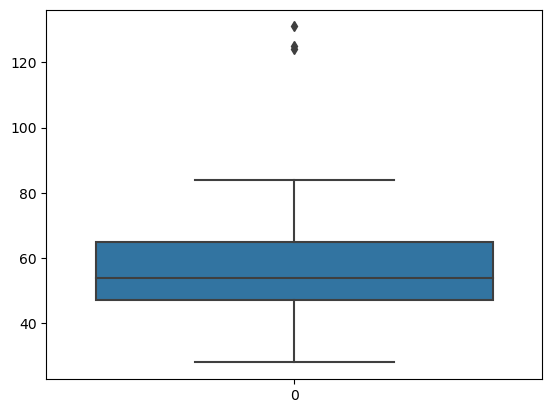

In [200]:
sns.boxplot(df['Age'])

In [219]:
calculate_upper_bound('Age')

92.0

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

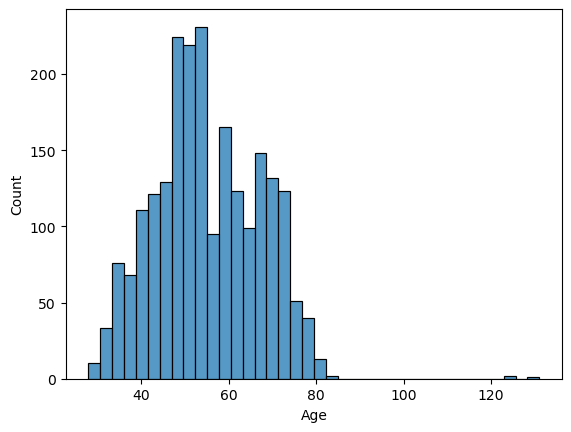

In [207]:
sns.histplot(df['Age'])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Income', ylabel='Count'>

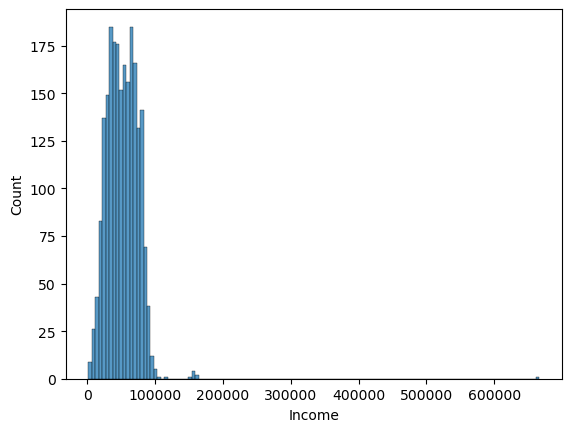

In [208]:
sns.histplot(df['Income'])

In [224]:
#Dropping the outliers by setting a cap on Age and income.
df = df[(df["Age"]<92)]
df = df[(df["Income"]<200000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2212


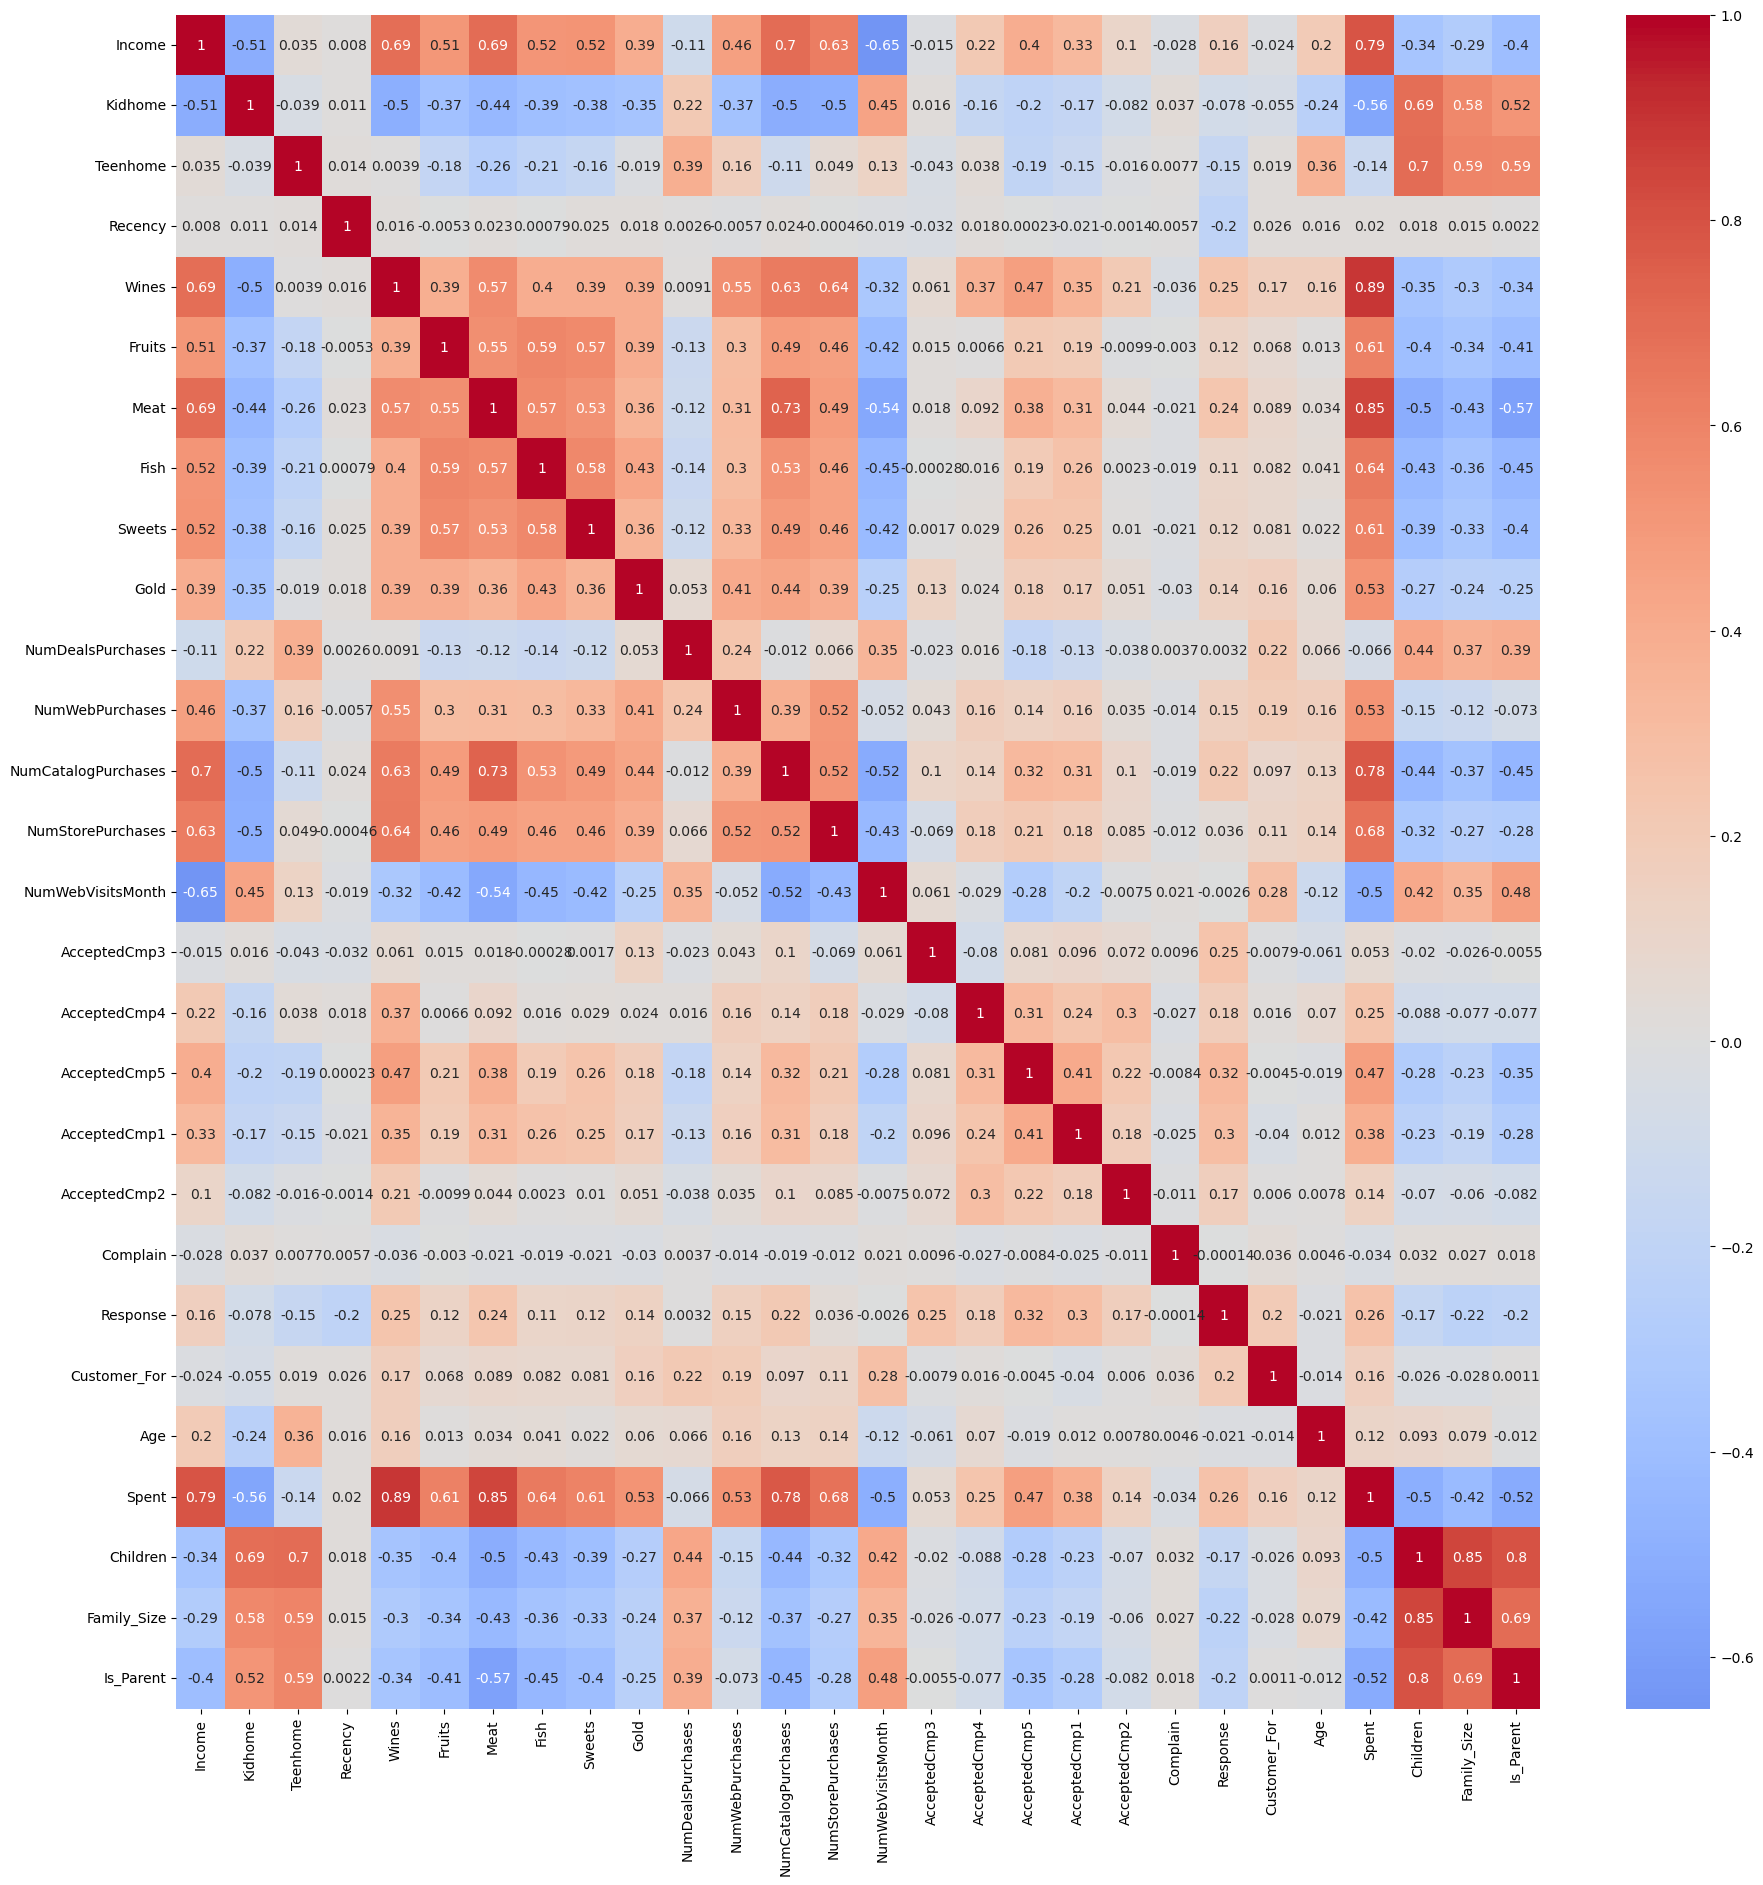

In [227]:
# Select only numeric columns
numeric_data = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
corrmat = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(22,22))
sns.heatmap(corrmat, annot=True, cmap='coolwarm', center=0)
plt.show()

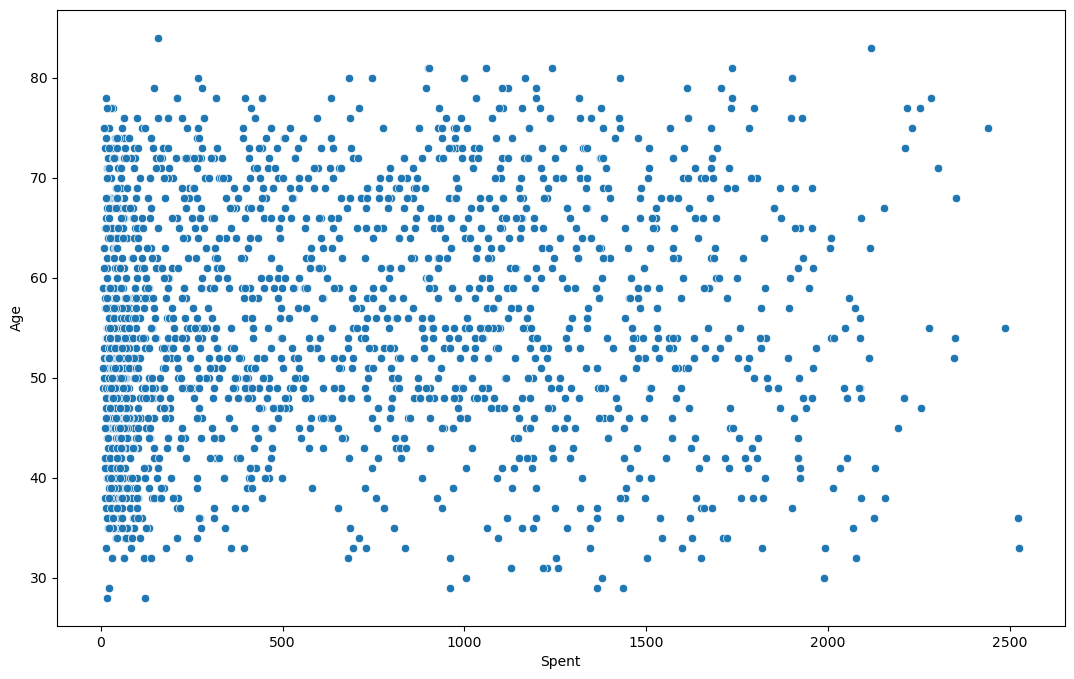

In [229]:
plt.figure(figsize=(13,8))
sns.scatterplot(x=df['Spent'], y=df['Age']);

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-

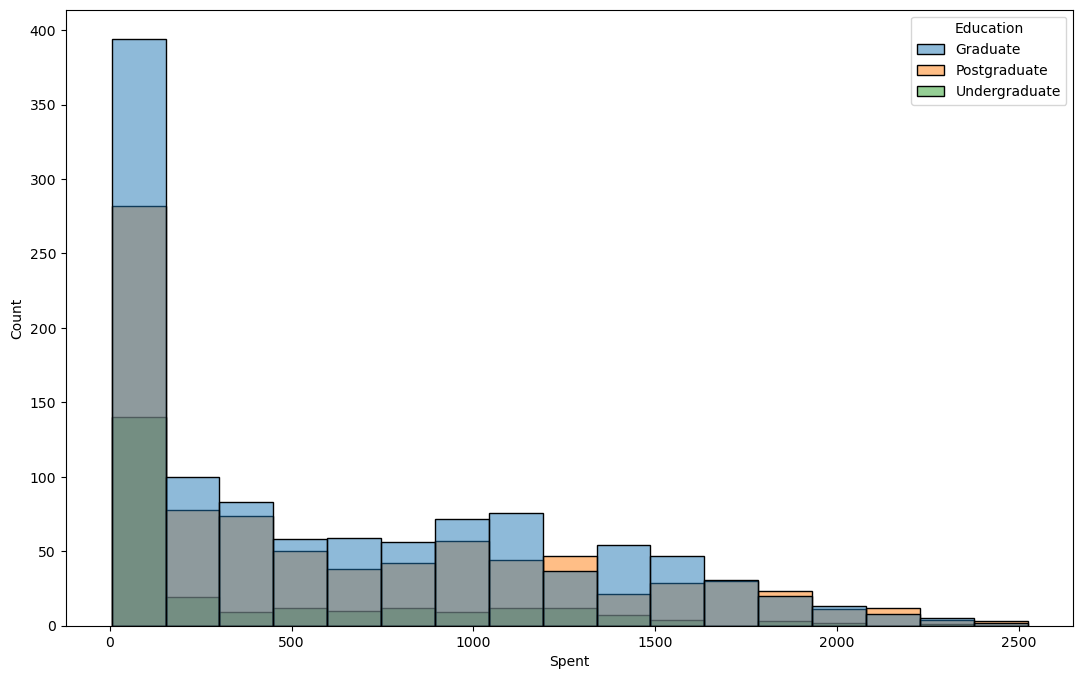

In [236]:
plt.figure(figsize=(13,8))
sns.histplot(x=df['Spent'], hue=df['Education']);

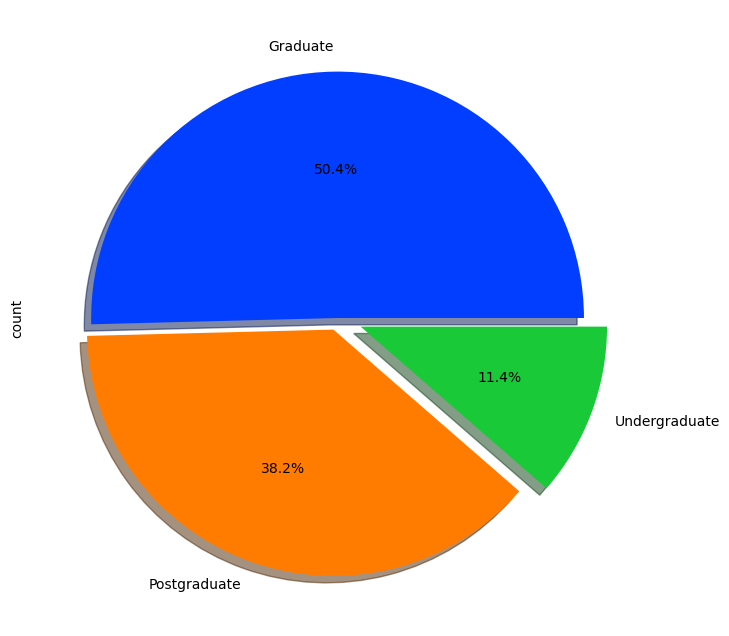

In [238]:
df['Education'].value_counts().plot.pie(explode=[0,0.05,0.1], autopct='%1.1f%%', shadow=True, figsize=(8,8), colors=sns.color_palette('bright'));

## Data Preprocessing

In [240]:
categorical_col = [col for col in df.columns if df[col].dtype=='object']
categorical_col

['Education', 'Living_With']

In [244]:
for col in categorical_col:
    print(df[col].value_counts())
    print()
    print()

Education
Graduate         1115
Postgraduate      845
Undergraduate     252
Name: count, dtype: int64


Living_With
Partner    1428
Alone       784
Name: count, dtype: int64




Converting Categorical columns into numeric

In [245]:
df['Education'] = df['Education'].map({'Undergraduate':0,'Graduate':1, 'Postgraduate':2})
df['Living_With'] = df['Living_With'].map({'Alone':0,'Partner':1})

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   int64  
 1   Income               2212 non-null   float64
 2   Kidhome              2212 non-null   int64  
 3   Teenhome             2212 non-null   int64  
 4   Recency              2212 non-null   int64  
 5   Wines                2212 non-null   int64  
 6   Fruits               2212 non-null   int64  
 7   Meat                 2212 non-null   int64  
 8   Fish                 2212 non-null   int64  
 9   Sweets               2212 non-null   int64  
 10  Gold                 2212 non-null   int64  
 11  NumDealsPurchases    2212 non-null   int64  
 12  NumWebPurchases      2212 non-null   int64  
 13  NumCatalogPurchases  2212 non-null   int64  
 14  NumStorePurchases    2212 non-null   int64  
 15  NumWebVisitsMonth    2212 non-null   int64 

Now all columns are numeric

In [249]:
#Creating a copy of data
ds = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [254]:
scaled_ds.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.411675,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.411675,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.411675,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.411675,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,1.123949,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


In [252]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)

PCA(n_components=3)

In [270]:
W = pca.components_.T
W

array([[ 0.01109081,  0.13149596, -0.35559957],
       [ 0.27902824,  0.166755  , -0.20513077],
       [-0.24607576,  0.00748038,  0.12228914],
       [-0.09833205,  0.45369205, -0.18429026],
       [ 0.00363579,  0.01728592,  0.01253223],
       [ 0.25613556,  0.209993  ,  0.00416775],
       [ 0.2383475 ,  0.01085674,  0.09739852],
       [ 0.28541057,  0.00891916, -0.00544216],
       [ 0.24869412,  0.0007286 ,  0.0999968 ],
       [ 0.2373067 ,  0.02182114,  0.09883502],
       [ 0.18886758,  0.12832674,  0.22803662],
       [-0.07703927,  0.35811299,  0.29111145],
       [ 0.1682945 ,  0.3012537 ,  0.19445062],
       [ 0.2773872 ,  0.10382633, -0.02156587],
       [ 0.24174176,  0.20320201,  0.00260757],
       [-0.22440763,  0.06718301,  0.39973566],
       [ 0.0315755 ,  0.12410007,  0.5233204 ],
       [ 0.03839064,  0.22531957, -0.34373994],
       [ 0.32035193,  0.13416973,  0.04213318],
       [-0.02756447,  0.12104539, -0.10913217],
       [-0.24770857,  0.33482504, -0.046

In [272]:
pd.DataFrame(W, index=scaled_ds.columns, columns=['col1','col2','col3'])

,col1,col2,col3
Education,0.011091,0.131496,-0.355600
Income,0.279028,0.166755,-0.205131
Kidhome,-0.246076,0.007480,0.122289
Teenhome,-0.098332,0.453692,-0.184290
Recency,0.003636,0.017286,0.012532
Wines,0.256136,0.209993,0.004168
Fruits,0.238348,0.010857,0.097399
Meat,0.285411,0.008919,-0.005442
Fish,0.248694,0.000729,0.099997
Sweets,0.237307,0.021821,0.098835


In [274]:
pca.explained_variance_

array([8.28188643, 2.94989797, 1.57750394])

In [276]:
pca.explained_variance_ratio_

array([0.35991923, 0.12819845, 0.06855612])

In [277]:
pd.DataFrame(pca.explained_variance_ratio_, index=range(1,4), columns=['Explained Variability'])

,Explained Variability
1,0.359919
2,0.128198
3,0.068556


In [278]:
pca.explained_variance_ratio_.cumsum()

array([0.35991923, 0.48811768, 0.55667381])

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


Text(0, 0.5, 'Lambda i')

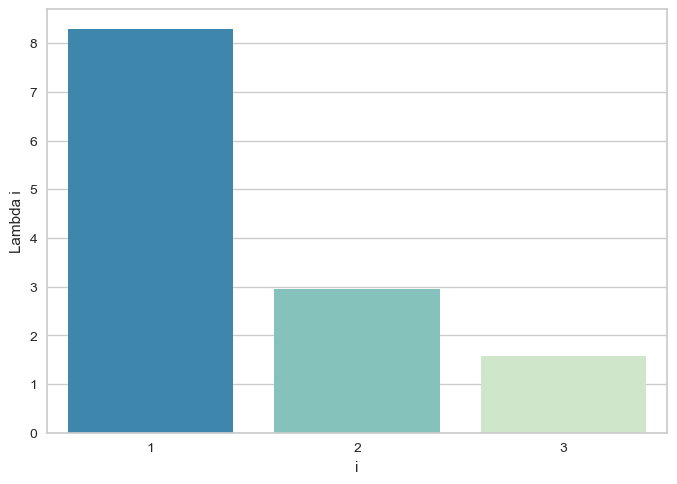

In [280]:
sns.barplot(x = list(range(1,4)), y = pca.explained_variance_, palette = 'GnBu_r')
plt.xlabel('i')
plt.ylabel('Lambda i')

In [261]:
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-1.927331e-17,2.877827,-5.952498,-2.539815,-0.770318,2.416599,7.482261
col2,2212.0,0.000000e+00,1.717527,-4.270144,-1.323622,-0.160947,1.242417,6.302407
col3,2212.0,8.030546e-18,1.255988,-3.969471,-0.841057,-0.011389,0.828072,5.934278


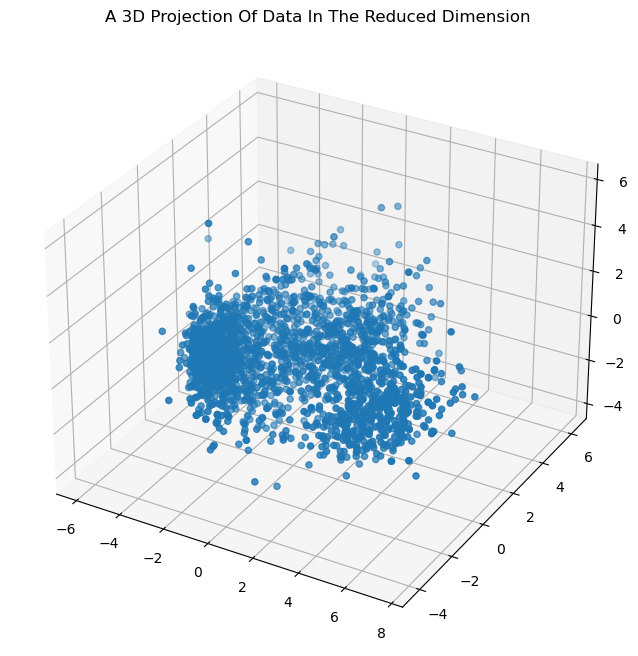

In [263]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

## K-Means Clustering

Elbow Method to determine the number of clusters to be formed:


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

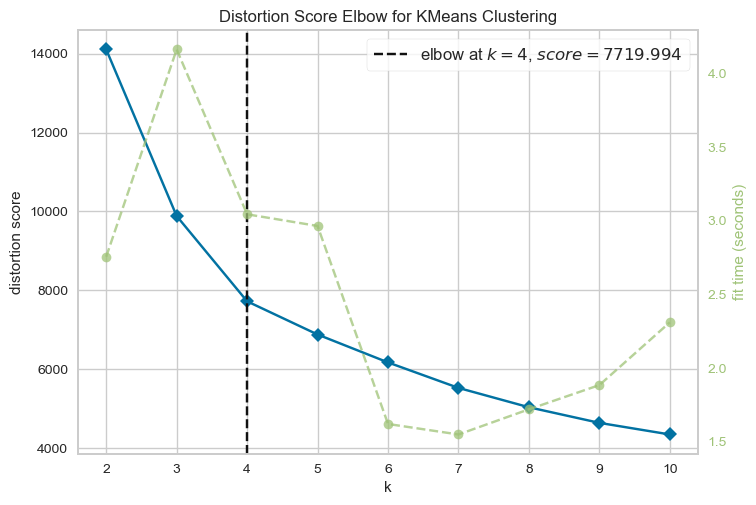

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [268]:
# Elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [284]:
#Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

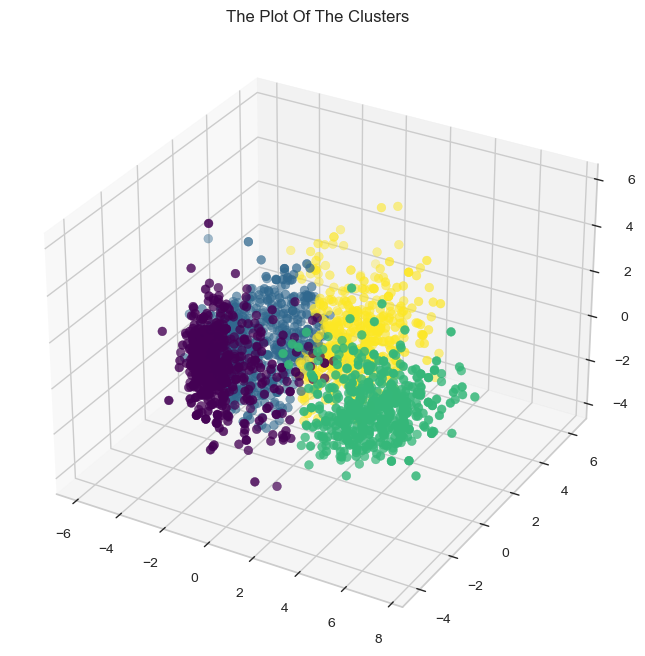

In [295]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

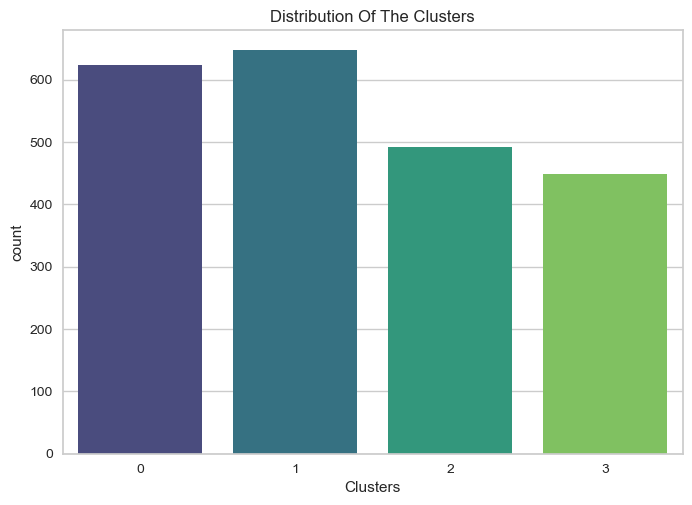

In [293]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette= 'viridis')
pl.set_title("Distribution Of The Clusters")
plt.show()

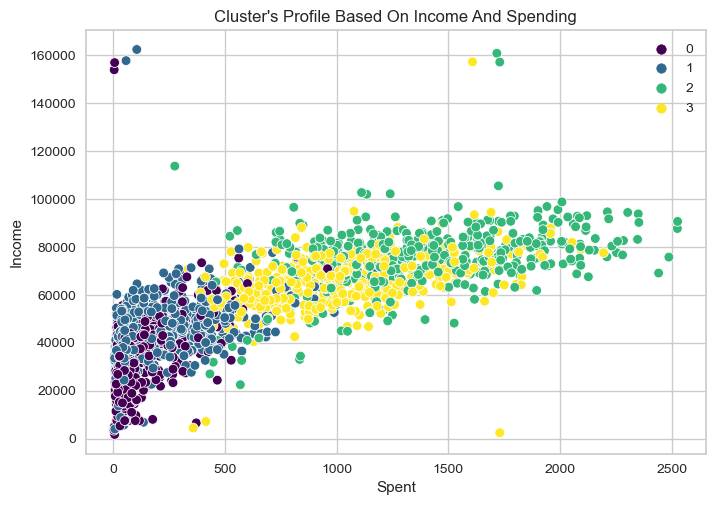

In [297]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= 'viridis')
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### Income vs spending plot shows the clusters pattern

* group 0: low spending & low income
* group 1: low spending & average income
* group 2: high spending & high income
* group 3: high spending & average income

D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

<Axes: xlabel='Clusters', ylabel='Spent'>

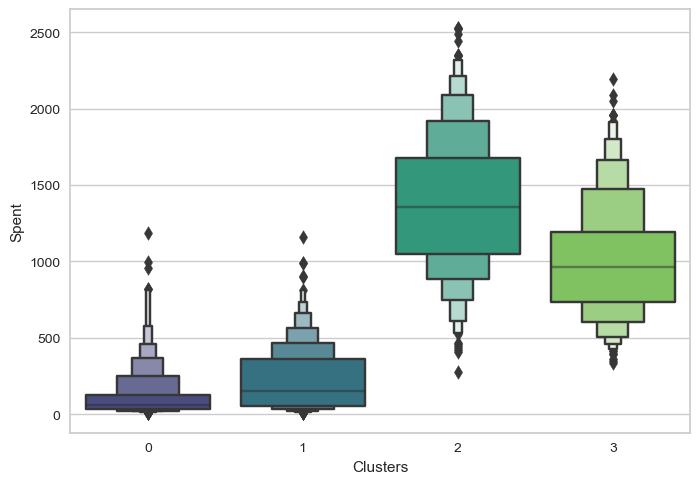

In [300]:
sns.boxenplot(x=df['Clusters'], y=df['Spent'], palette='viridis')

Cluster 2 is our biggest set of Customers closely followed by cluster 3

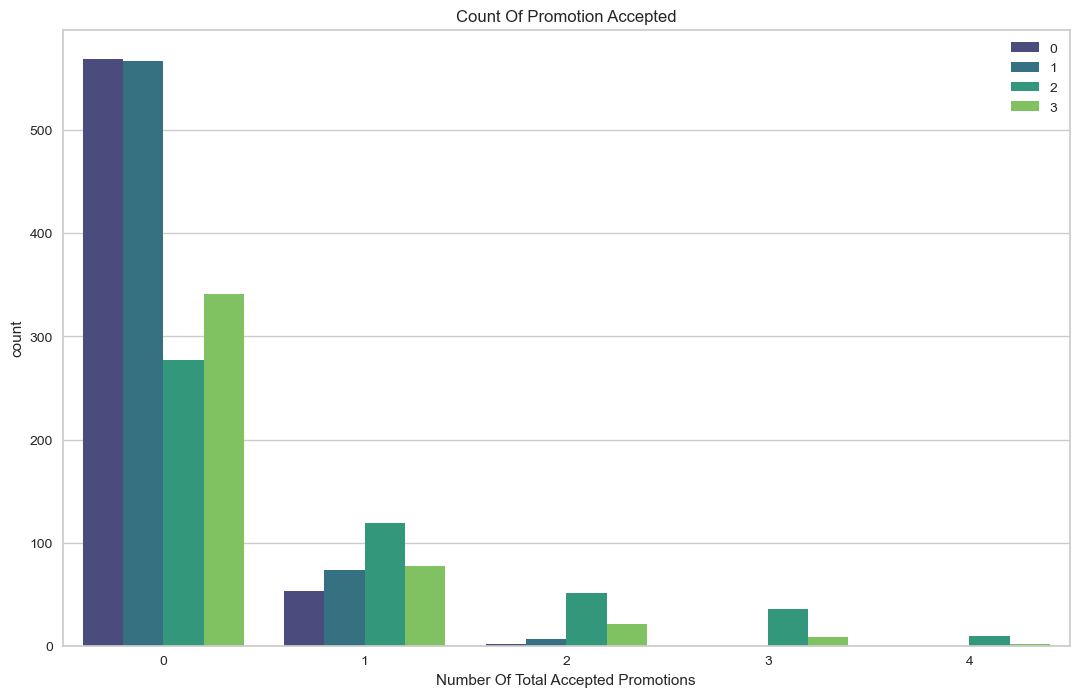

In [307]:
df['Total_Promos'] = df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+ df['AcceptedCmp5']

plt.figure(figsize=(13,8))
pl = sns.countplot(x=df['Total_Promos'], hue=df['Clusters'], palette= 'viridis')
pl.set_title('Count Of Promotion Accepted')
pl.set_xlabel('Number Of Total Accepted Promotions')
plt.legend(loc='upper right')
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('

Text(0.5, 1.0, 'Number of Deals Purchased')

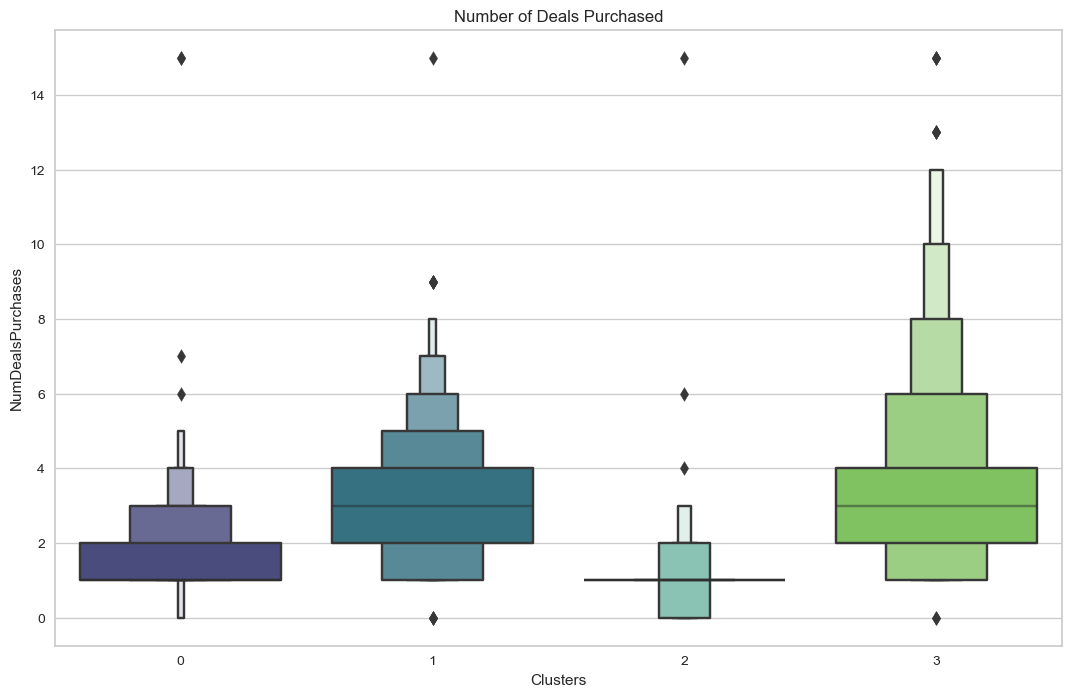

In [304]:
plt.figure(figsize=(13,8))
pl=sns.boxenplot(y=df['NumDealsPurchases'],x=df['Clusters'], palette= 'viridis')
pl.set_title('Number of Deals Purchased')

Unlike campaigns, the deals offered did well. It has best outcome with cluster 1 and cluster 3. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 0 overwhelmingly

## Profilling

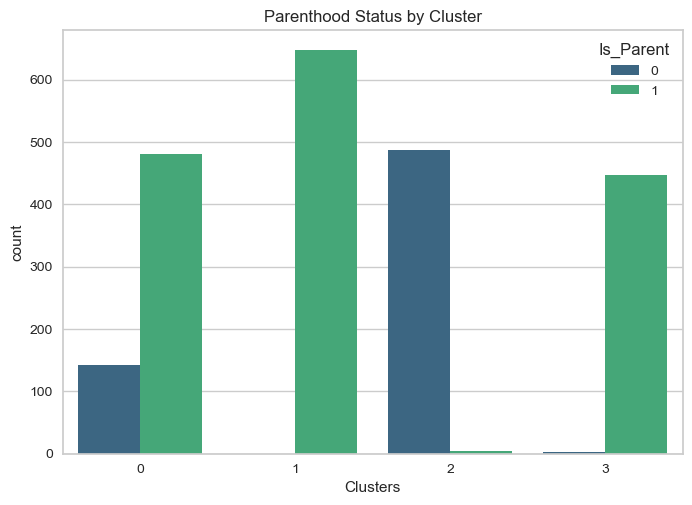

In [308]:
plt.figure()
sns.countplot(x='Clusters', hue='Is_Parent', data=df, palette='viridis')
plt.title('Parenthood Status by Cluster')
plt.show()

* Cluster 0 are majorly parents  
* Cluster 1 are definitely a parent
* Cluster 2 are definitely not a parent
* Cluster 3 are definitely a parent

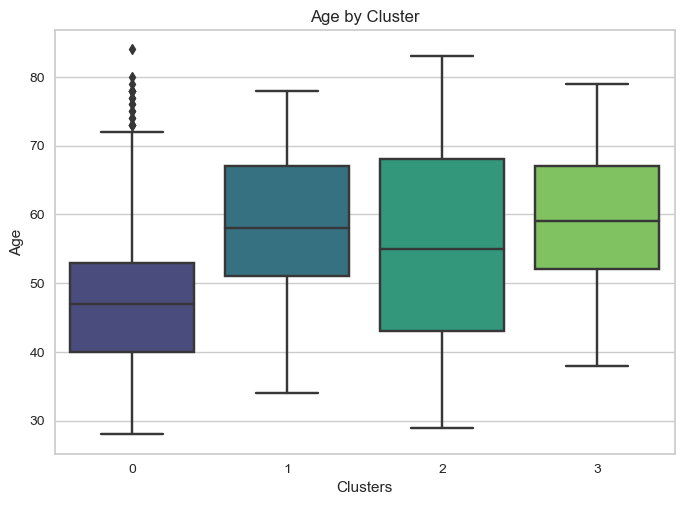

In [310]:
plt.figure()
sns.boxplot(x='Clusters', y='Age', data=df, palette='viridis')
plt.title('Age by Cluster')
plt.show()

* Cluster 0 has younger customers than all the other cluster
* Cluster 2 has customers of all ages
* Cluster 1 and Cluster 3 has relatively older customers

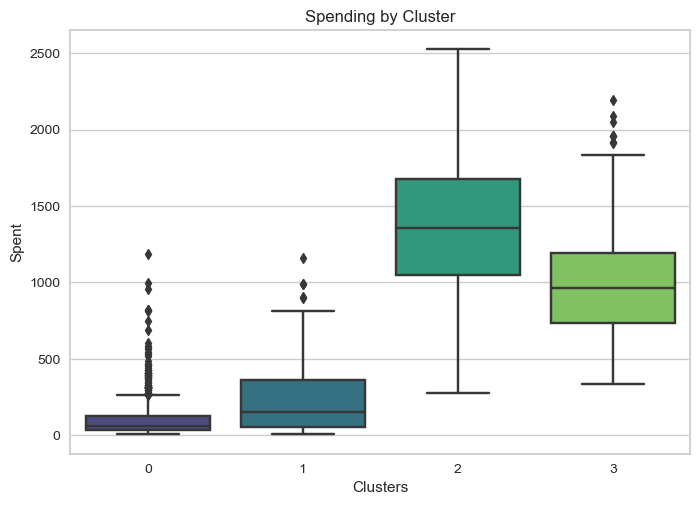

In [313]:
plt.figure()
sns.boxplot(x='Clusters', y='Spent', data=df, palette='viridis')
plt.title('Spending by Cluster')
plt.show()

Cluster 2 is our biggest set of Customers closely followed by cluster 3

In [316]:
customer_count = df['Clusters'].value_counts()
customer_count

Clusters
1    647
0    624
2    492
3    449
Name: count, dtype: int64

<Axes: xlabel='Clusters'>

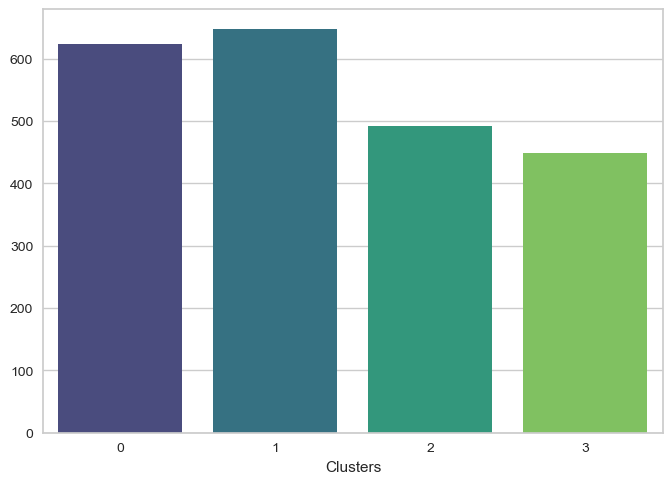

In [317]:
sns.barplot(x=customer_count.index, y=customer_count.values, palette='viridis')

Cluster 1 has most number of customers closely followed by cluster 0

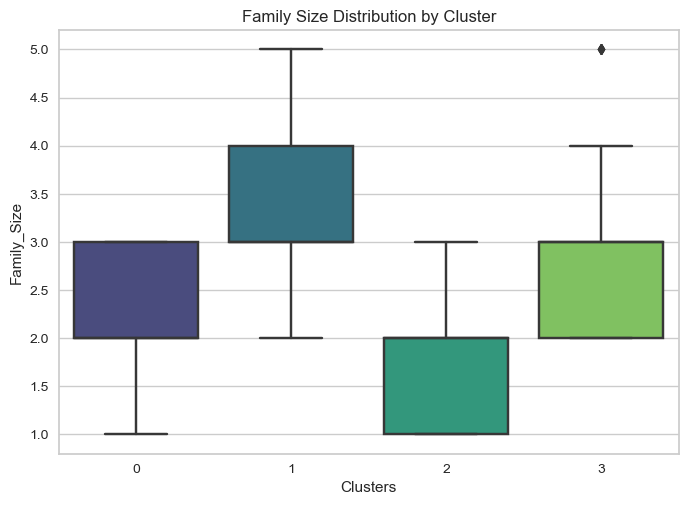

In [319]:
plt.figure()
sns.boxplot(x='Clusters', y='Family_Size', data=df, palette='viridis')
plt.title('Family Size Distribution by Cluster')
plt.show()

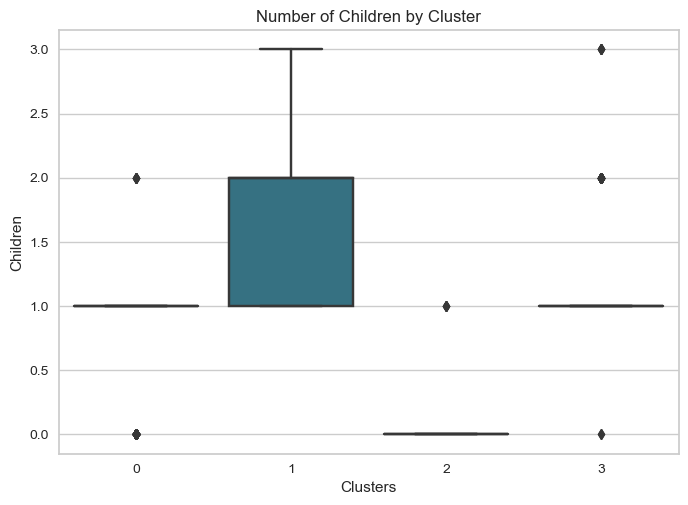

In [321]:
plt.figure()
sns.boxplot(x='Clusters', y='Children', data=df, palette='viridis')
plt.title('Number of Children by Cluster')
plt.show()

Cluster 1 contains bigger families so introducing discounts on family pack items would extract these customers more